# Naive Bayes 
**A parametric, eager learning classifier based on Bayes' theorem with an assumption of independence among the predictors** 

### Remeber Bayes Theorem? 
P(H|E) = (P(E|H) * P(H)) / P(E)

**where:**

* P(H|E) is the probability of hypothesis H given the event E, a posterior probability.
* P(E|H) is the probability of event E given that the hypothesis H is true.
* P(H) is the probability of hypothesis H being true (regardless of any related event), or prior probability of H.
* P(E) is the probability of the event occurring (regardless of the hypothesis).

### Let's look at an example: 
Let's say that we are interested in knowing whether an e-mail that contains the word sex (event) is spam (hypothesis). If we go back to the theorem description, this problem can be formulated as:

**P(class=SPAM|contains="sex") = (P(contains="sex"|class=SPAM) * P(class=SPAM)) / P(contains="sex")**

The probability of an e-mail containing the word sex being spam is equal to the proportion of SPAM emails that contain the word sex multiplied by the proportion of e-mails being spam and divided by the proportion of e-mails containing the word sex.

Let's dissect this:

* P(class=SPAM|contains="sex") is the probability of an e-mail being SPAM given that this e-mail contains the word sex. This is what we are interested in predicting.
* P(contains="sex"|class=SPAM) is the probability of an e-mail containing the word sex given that this e-mail has been recognized as SPAM. This is our training data, which represents the correlation between an e-mail being considered SPAM and such e-mail containing the word sex.
* P(class=SPAM) is the probability of an e-mail being SPAM (without any prior knowledge of the words it contains). This is simply the proportion of e-mails being SPAM in our entire training set. We multiply by this value because we are interested in knowing how significant is information concerning SPAM e-mails. If this value is low, the significance of any events related to SPAM e-mails will also be low.
* P(contains="sex") is the probability of an e-mail containing the word sex. This is simply the proportion of e-mails containing the word sex in our entire training set. We divide by this value because the more exclusive the word sex is, the more important is the context in which it appears. Thus, if this number is low (the word appears very rarely), it can be a great indicator that in the cases it does appear, it is a relevant feature to analyze.

In summary, the Bayes Theorem allows us to make reasoned deduction of events happening in the real world based on prior knowledge of observations that may imply it. To apply this theorem to any problem, we need to compute the two types of probabilities that appear in the formula.

**Class Probabilities**

In the theorem, P(A) represents the probabilities of each event. In the Naive Bayes Classifier, we can interpret these Class Probabilities as simply the frequency of each instance of the event divided by the total number of instances. For example, in the previous example of spam detection, P(class=SPAM) represents the number of e-mails classified as spam divided by the sum of all instances (this is spam + not spam)

**P(class=SPAM) = count(class=SPAM) / (count(class=notSPAM) + count(class=SPAM))**

**Conditional Probabilities**

In the theorem, P(A|B) represents the conditional probabilities of an event A given another event B. In the Naive Bayes Classifier, these encode the posterior probability of A occurring when B is true.

For the spam example, P(class=SPAM|contains="sex") represents the number of instances in which an e-mail is considered as spam and contains the word sex, divided by the total number of e-mails that contain the word sex:

**P(class=SPAM|contains="sex") = count(class=SPAM & contains=sex) / count(contains=sex)** 

## Applying Bayes 

1. Calculate prior probability for given class labels 
2. Calculate conditional probability with each attribute for each class 
3. Multiply same class conditional probability 
4. Multiply prior probability with step 3 probability 
5. See which class has a higher probability, higher probability class belongs to given input set step 

In [1]:
#load libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.style.use('ggplot')

#load the dataset
df = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#replace 0 with NaNs because they will be easier to replace and detect
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
## showing the count of Nans
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [3]:
#replacing 0's with appropriate stats
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

In [4]:
#create target and features 
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

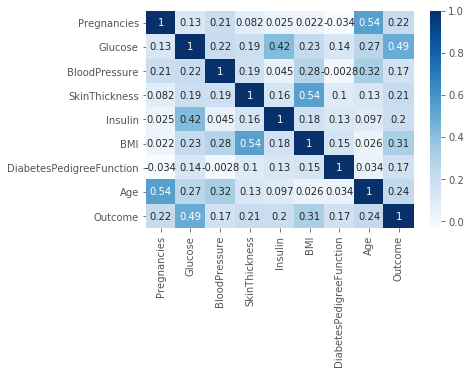

In [5]:
#check multicollinearity 
corr = df.corr()
ax1 = sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()


In [6]:
#importing train_test_split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,
                                                 random_state=42)

In [7]:
#scale features 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**There are 3 available classifiers for Naive Bayes in sklearn.** 

1. Gaussian: It assumes that continuous features follow a normal distribution.
![](https://www.simplypsychology.org/normal-distribution.jpg?ezimgfmt=rs:555x353/rscb18/ng:webp/ngcb18)

2. Bernoulli: The binomial model is useful if your features are binary.

3. Multinomial: It is useful if your features are discrete.

In [9]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
#make predictions and evaluate 
y_pred = nb_model.predict(X_test)

print('-'*40)
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))

print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, y_pred))

----------------------------------------
Accuracy Score:
0.7564935064935064
----------------------------------------
Confusion Matrix:
[[165  41]
 [ 34  68]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       206
           1       0.62      0.67      0.64       102

    accuracy                           0.76       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.76      0.76      0.76       308



## Pros and Cons 
**Pros:** 
- It is not only a simple approach but also a fast and accurate method for prediction.
- Naive Bayes has very low computation cost.
- It can efficiently work on a large dataset.
- It performs well in case of discrete response variable compared to the continuous variable.
- It can be used with multiple class prediction problems.
- It also performs well in the case of text analytics problems.
- When the assumption of independence holds, a Naive Bayes classifier performs better compared to other models like logistic regression.

**Cons:**
- Require to remove correlated features because they are voted twice in the model and it can lead to over inflating importance.

- If a categorical variable has a category in test data set which was not observed in training data set, then the model will assign a zero probability. It will not be able to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace smoothing. Sklearn applies Laplace smoothing by default when you train a Naive Bayes classifier. For more info on smoothing [go here](https://medium.com/syncedreview/applying-multinomial-naive-bayes-to-nlp-problems-a-practical-explanation-4f5271768ebf)